In [34]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data_train=pd.read_csv("ASTRAMICRO.NS.csv")
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-01,26.733334,28.000000,25.466665,27.973333,23.467009,153375
1,2004-11-08,29.333332,29.333332,27.466665,27.866667,23.377522,47760
2,2004-11-15,27.866667,28.966665,27.000000,27.466665,23.041958,42465
3,2004-11-22,27.933332,30.700001,27.333332,30.506666,25.592236,156330
4,2004-11-29,30.593332,31.093332,27.420000,27.773333,23.299223,56370


In [50]:
stockprices = pd.read_csv("ASTRAMICRO.NS.csv", index_col="Date")

test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stockprices))
test_size = int(test_ratio * len(stockprices))
print(f"train_size: {train_size}")
print(f"test_size: {test_size}")

train = stockprices[:train_size][["Close"]]
test = stockprices[train_size:][["Close"]]

train_size: 762
test_size: 190


,Close
Date,
2019-06-10,90.349998
2019-06-17,87.050003
2019-06-24,84.199997
2019-07-01,84.900002
2019-07-08,81.599998
...,...
2023-01-02,283.600006
2023-01-09,283.549988
2023-01-16,281.100006


In [37]:
training_set=train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)


[]
(762, 0)


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler_training_set=scaler.fit_transform(train)
scaler_training_set

array([[2.82245260e-02],
       [2.75938141e-02],
       [2.52286178e-02],
       [4.32040252e-02],
       [2.70419338e-02],
       [3.53200733e-02],
       [5.99968226e-02],
       [7.84846826e-02],
       [7.91942557e-02],
       [7.56858949e-02],
       [8.92462717e-02],
       [1.27719946e-01],
       [1.17667906e-01],
       [1.41516847e-01],
       [2.09476494e-01],
       [1.94536399e-01],
       [2.13694405e-01],
       [2.41524755e-01],
       [2.51537343e-01],
       [2.73139371e-01],
       [2.60998069e-01],
       [2.92336780e-01],
       [3.63765361e-01],
       [3.74250998e-01],
       [3.72319423e-01],
       [3.14687767e-01],
       [3.44883290e-01],
       [3.85249111e-01],
       [3.93566690e-01],
       [3.79809193e-01],
       [3.43306522e-01],
       [3.70072515e-01],
       [3.86865301e-01],
       [4.20963396e-01],
       [4.39451238e-01],
       [4.74968432e-01],
       [5.80022058e-01],
       [7.73533576e-01],
       [7.58514608e-01],
       [7.72351001e-01],


In [39]:
X_train=[]
Y_train=[]
for i in range(60,762):
    X_train.append(scaler_training_set[i-60:i,0])
    Y_train.append(scaler_training_set[i:0])
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [40]:
print(X_train.shape)
print(Y_train.shape)
print(X_train)
print(Y_train)

(702, 60)
(702, 0, 1)
[[0.02822453 0.02759381 0.02522862 ... 0.67151524 0.71822769 0.73163037]
 [0.02759381 0.02522862 0.04320403 ... 0.71822769 0.73163037 0.73340428]
 [0.02522862 0.04320403 0.02704193 ... 0.73163037 0.73340428 0.69102803]
 ...
 [0.31634339 0.34649953 0.3476821  ... 0.38463811 0.36423841 0.35536897]
 [0.34649953 0.3476821  0.34058657 ... 0.36423841 0.35536897 0.37665562]
 [0.3476821  0.34058657 0.4671239  ... 0.35536897 0.37665562 0.3828642 ]]
[]


In [41]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(702, 60, 1)

In [42]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [43]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [44]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
22/22 [==============================] - 7s 54ms/step - loss: nan
Epoch 2/100
22/22 [==============================] - 1s 54ms/step - loss: nan
Epoch 3/100
22/22 [==============================] - 1s 54ms/step - loss: nan
Epoch 4/100
22/22 [==============================] - 1s 54ms/step - loss: nan
Epoch 5/100
22/22 [==============================] - 1s 55ms/step - loss: nan
Epoch 6/100
22/22 [==============================] - 1s 53ms/step - loss: nan
Epoch 7/100
22/22 [==============================] - 1s 53ms/step - loss: nan
Epoch 8/100
22/22 [==============================] - 1s 54ms/step - loss: nan
Epoch 9/100
22/22 [==============================] - 1s 53ms/step - loss: nan
Epoch 10/100
22/22 [==============================] - 1s 53ms/step - loss: nan
Epoch 11/100
22/22 [==============================] - 1s 53ms/step - loss: nan
Epoch 12/100
22/22 [==============================] - 1s 53ms/step - loss: nan
Epoch 13/100
22/22 [==============================] - 1s 54ms

Extracting the Actual Stock Price

In [56]:

actual_stock_price=test.iloc[:].values
actual_stock_price

array([[ 90.349998],
       [ 87.050003],
       [ 84.199997],
       [ 84.900002],
       [ 81.599998],
       [ 77.900002],
       [ 81.300003],
       [ 77.849998],
       [ 77.449997],
       [ 75.400002],
       [ 72.349998],
       [ 76.75    ],
       [ 77.5     ],
       [ 78.150002],
       [ 77.900002],
       [ 78.900002],
       [ 79.      ],
       [ 77.699997],
       [ 78.75    ],
       [ 76.599998],
       [ 77.199997],
       [ 75.599998],
       [ 76.449997],
       [ 90.849998],
       [ 89.199997],
       [ 88.400002],
       [ 87.      ],
       [ 83.800003],
       [ 83.550003],
       [ 83.5     ],
       [ 82.75    ],
       [ 88.5     ],
       [ 93.199997],
       [ 89.400002],
       [ 95.050003],
       [ 95.800003],
       [ 98.949997],
       [ 87.5     ],
       [ 83.699997],
       [ 65.949997],
       [ 59.099998],
       [ 56.150002],
       [ 55.      ],
       [ 61.700001],
       [ 70.650002],
       [ 65.900002],
       [ 64.650002],
       [ 60.5

 Preparing the Input for the Model
 

In [51]:

dataset_total=pd.concat((train['Close'],test['Close']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
X_test=[]
for i in range(60,190):
    X_test.append(inputs[i-60:i, 0])
 
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
dataset_total



c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Date
2004-11-01     27.973333
2004-11-08     27.866667
2004-11-15     27.466665
2004-11-22     30.506666
2004-11-29     27.773333
                 ...    
2023-01-02    283.600006
2023-01-09    283.549988
2023-01-16    281.100006
2023-01-23    260.600006
2023-01-27    260.600006
Name: Close, Length: 953, dtype: float64

In [52]:
actual_stock_price

array([], shape=(191, 0), dtype=float64)

In [53]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)
predicted_stock_price


5/5 [==============================] - 2s 21ms/step


array([[0.01295056],
       [0.01304981],
       [0.01314333],
       [0.01322956],
       [0.01330702],
       [0.01337456],
       [0.01343077],
       [0.01347443],
       [0.01350478],
       [0.01352075],
       [0.01352157],
       [0.013507  ],
       [0.01347623],
       [0.01342954],
       [0.01336794],
       [0.01329285],
       [0.01320673],
       [0.01311254],
       [0.01301306],
       [0.01291102],
       [0.01280888],
       [0.01270875],
       [0.01261203],
       [0.01251959],
       [0.01243193],
       [0.012351  ],
       [0.01227912],
       [0.01221882],
       [0.01217227],
       [0.01214063],
       [0.01212429],
       [0.01212255],
       [0.01213394],
       [0.01215698],
       [0.01219076],
       [0.01223444],
       [0.01228802],
       [0.01235183],
       [0.01242633],
       [0.01251096],
       [0.01260375],
       [0.01269971],
       [0.01279115],
       [0.01286856],
       [0.01292192],
       [0.01294278],
       [0.01292647],
       [0.012

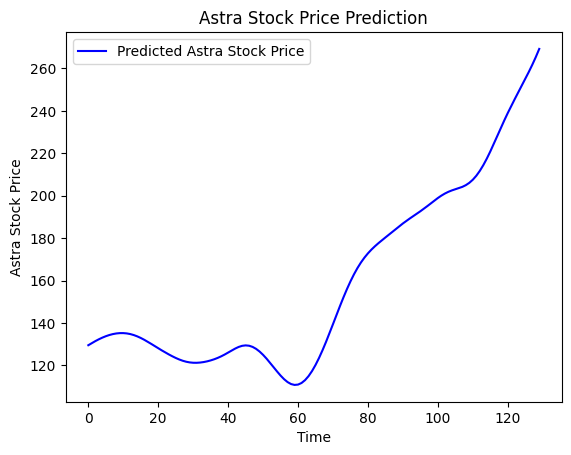

In [62]:

plt.plot(predicted_stock_price*10000,color='blue',label='Predicted Astra Stock Price')
plt.title('Astra Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Astra Stock Price')
plt.legend()

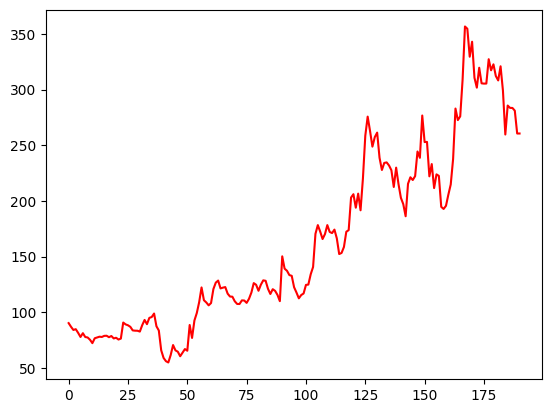

In [58]:
plt.plot(actual_stock_price,color='red',label='Actual Astra Stock Price')
